In [3]:
%pylab inline
import matplotlib.pyplot as plt
#pylab.rcParams['figure.figsize'] = (8.0, 15.0)
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [4]:
def read_frcmod(frcmod):
    #This function allows me to read the frcmod files and two return dictionary with all the values I need for the plot
    reader = open(frcmod,"r").readlines()
    dict_val = {}
    skip_index =reader.index("DIHE\n") +1 

    for val in reader[skip_index:]:
        #print(val)
        if val=="\n":
            continue
        else:
            dihe_type = (val.split()[0]) + val.split()[1] + val.split()[2] # subdivision valid only for dihedral
            amplitude = float(val.split()[4])
            phase     = float(val.split()[5])
            multi     = abs(float(val.split()[6]))
            if dihe_type in dict_val:
                dict_val[dihe_type].append([amplitude,phase,multi])
            else:
                dict_val[dihe_type] = [ [amplitude,phase,multi] ]
    return dict_val

In [5]:
def dihedral(frcmod,frcmod_fit):
    #here I want to plot the functional form of the new frcmod vs old frcmod
    #if they are similar we should have a similar behavior
    
    color = sbn.color_palette()
    marker = ['o', '^','v','8']
    #pass the frcmod file
    #read torough it and create a dictionary like:
    #dict[type]={ [ampl_1,delay_1,multi_1],[ampl_2,delay_2,multi_2]...}
    original = read_frcmod(frcmod)
    fitted   = read_frcmod(frcmod_fit)
  

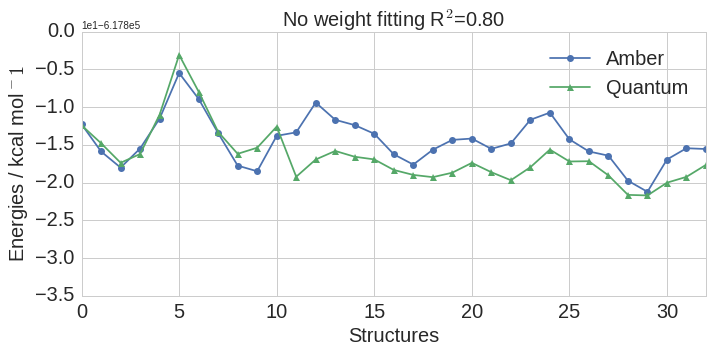

In [8]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
energies = loadtxt("no_weight/amber_quantum_fit.dat",usecols=[0,1,2],skiprows=1)
#these are the energies + offset
#now plot them
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(energies[:,0],energies[:,1],color=color[0],marker=marker[0],label="Amber")
ax.plot(energies[:,0],energies[:,2],color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,32)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.title("No weight fitting R$^2$=0.80",fontsize=20)
plt.tight_layout()
#print(energies[:,0])
#Basically what we are showing here is how the Amber potential energy (Bond + Angles + dihedral + Coulomb + LJ) is similar
#to the quantum mechanical energy

In [9]:
#Here I have put a weigth of 0.0 to all the structures higher than -1.5 in energy
#in the quantum_energies.dat file
#so the new quantum energy file is in folder: weight/quantum_weight.dat
#1e1-3.1111e5
for i, val in enumerate(energies[:,1],0):
    if val>(-1.2*1e1-6.178e5):
        print("Put zero to structure")
        print(i)
    else:
        continue

Put zero to structure
4
Put zero to structure
5
Put zero to structure
6
Put zero to structure
12
Put zero to structure
13
Put zero to structure
23
Put zero to structure
24
Put zero to structure
87
Put zero to structure
88
Put zero to structure
114
Put zero to structure
115


(0, 143)

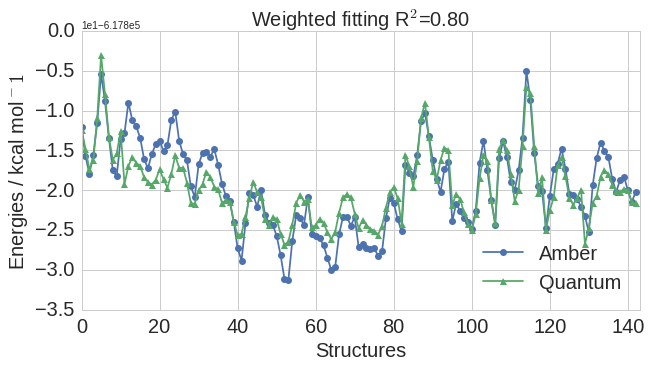

In [12]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
energies = loadtxt("weight_1/amber_quantum_fit.dat",usecols=[0,1,2],skiprows=1)
#these are the energies + offset
#now plot them
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(energies[:,0],energies[:,1],color=color[0],marker=marker[0],label="Amber")
ax.plot(energies[:,0],energies[:,2],color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.title("Weighted fitting R$^2$=0.80",fontsize=20)
plt.xlim(0,143)
#print(energies[:,0])

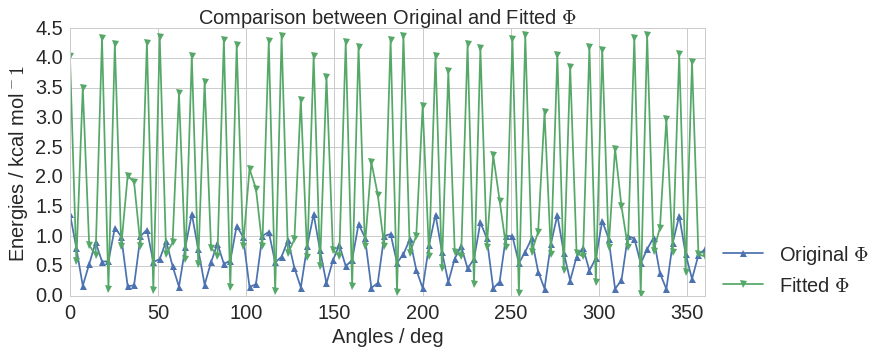

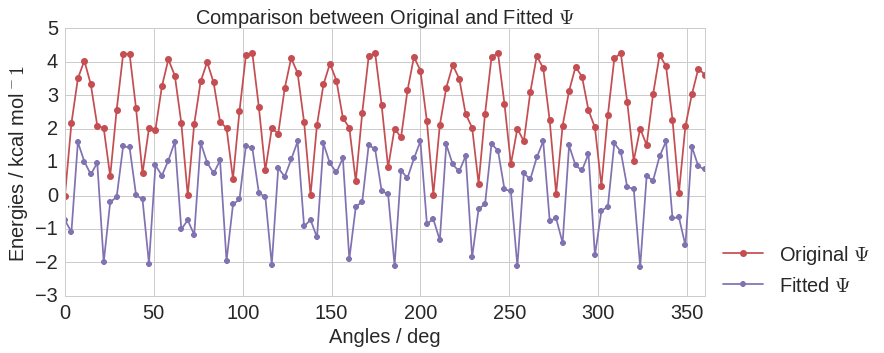

In [13]:
angles = linspace(0,360,100)
#plot the original function of CNCXC and NCXCN
original_phi = []
original_psi = []
for angle in angles:
    phi = 0.0 + 0.27*(1 + math.cos(angle*2.0)) + 0.42*(1+math.cos(angle*3)) + 0.0
    original_phi.append(phi)
    psi = 0.45*(1+math.cos(angle*1.0 - math.pi)) + 1.58*(1+math.cos(angle*2.0 - math.pi)) + 0.55*(1+math.cos(angle*3.0 -
                math.pi)) + 0.0
    original_psi.append(psi)


#here the not weighted fit
fitted_phi =[]
fitted_psi = []
for angle in angles:
    phi = 2.1702*(1+math.cos(angle*1.0)) + 0.4916*(1+math.cos(angle*2.0)) -0.1695*(1+math.cos(angle*3)) -0.4772*\
          (1+math.cos(angle*4))
    fitted_phi.append(phi)
    psi = -0.8580*(1+math.cos(angle*1.0-math.pi)) + 1.2864*(1+math.cos(angle*2 -math.pi)) +0.1530*(1+math.cos(angle*3 -
            math.pi)) -0.3701 *(1+math.cos(angle*4))
    fitted_psi.append(psi)

fig,ax = plt.subplots(figsize=[10,5])
color=sbn.color_palette()
marker=['^','v','o','8']
ax.plot(angles,original_phi,color=color[0],marker=marker[0],label="Original $\Phi$")
ax.plot(angles,fitted_phi,color=color[1],marker=marker[1],label="Fitted $\Phi$")
plt.xlabel("Angles / deg",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,360)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
ax.legend(loc='center left' , bbox_to_anchor=(1.0, 0.1),ncol=1, fancybox=True, shadow=True,fontsize=20)
plt.title("Comparison between Original and Fitted $\Phi$",fontsize=20)
plt.tight_layout()

fig,ax = plt.subplots(figsize=[10,5])
ax.plot(angles,original_psi,color=color[2],marker=marker[2],label="Original $\Psi$")
ax.plot(angles,fitted_psi,color=color[3],marker=marker[3],label="Fitted $\Psi$")
plt.xlabel("Angles / deg",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,360)
plt.title("Comparison between Original and Fitted $\Psi$",fontsize=20)
ax.legend(loc='center left' , bbox_to_anchor=(1.0, 0.1),ncol=1, fancybox=True, shadow=True,fontsize=20)
plt.tight_layout()

